In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/twitter-suicidal-intention-dataset/master/twitter-suicidal_data.csv")

In [ ]:
data.head(10)

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1
5,i am great and wonderful i am worth it except ...,1
6,i ll be dead just you wait and see my last wor...,1
7,health anxiety prompting some bad thoughts in ...,1
8,everything is okay but nothing feels okay i ve...,1
9,ptsd and alcohol i had some extremely horrible...,1


In [ ]:
data.sample(6)

,tweet,intention
350,does it get worse later in the day for anyone ...,1
3964,at work then school work all dayfinals around ...,0
1790,tonights the night goodbye thank you for every...,1
7296,i am loving you a n d line at the moment and m...,0
3664,it s really depressing it teases me by workin...,0
1253,i cant do it i cant make friends i cant intera...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9119 non-null   object
 1   intention  9119 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.6+ KB


In [ ]:
data['intention'].value_counts()

0    5121
1    3998
Name: intention, dtype: int64

In [ ]:
!pip install pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-xes2ysfb
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-xes2ysfb
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7650 sha256=269695c587d6911fe633724262dc31d9ae9a9cf4f102cfd360e65890bb2f25ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-8oecrum2/wheels/d1/c3/bb/559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
import re

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)# contraction to expansion
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_rt(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
data['tweet'] = data['tweet']. apply(lambda x: get_clean(x))

# tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
vectorizer = TfidfVectorizer(max_features = 20000, ngram_range=(1,3), analyzer='char')

X = data['tweet']
y = data['intention']

X = vectorizer.fit_transform(X)

In [ ]:
X.shape

(9119, 10404)

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state =42, test_size =0.20)

In [ ]:
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[949  70]
 [ 79 726]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1019
           1       0.91      0.90      0.91       805

    accuracy                           0.92      1824
   macro avg       0.92      0.92      0.92      1824
weighted avg       0.92      0.92      0.92      1824



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


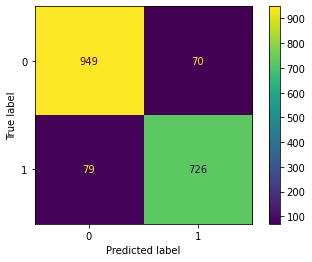

In [ ]:
from sklearn.metrics import   plot_confusion_matrix
plot_confusion_matrix(classifier,X_test,y_test)

In [ ]:
x = 'i want to die'

x = get_clean(x)
vec = vectorizer.transform([x])

classifier.predict(vec)

array([1])

# suicidal intended tweet it is

In [ ]:
x = 'i hate my life'

x = get_clean(x)
vec = vectorizer.transform([x])

classifier.predict(vec)

array([1])